# Machine Learning in Python - Project 2

Due Friday, April 12th by 4 pm.

*Include contributors names in notebook metadata or here*

## Setup

*Install any packages here and load data*

In [1]:
# Add any additional libraries or submodules below

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [2]:
# Load data in easyshare.csv
d = pd.read_csv("freddiemac.csv")
d.head()

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,prepaid,default
0,709.0,201703,9,204702,NaN,12,1,P,84,26,...,51300,F117Q1000376,N,360,2,Other sellers,Other servicers,NaN,0,1
1,649.0,201703,9,203202,33124.0,0,1,P,52,22,...,33100,F117Q1000418,C,180,2,Other sellers,Other servicers,NaN,1,0
2,747.0,201703,9,203702,41180.0,0,1,I,43,20,...,63100,F117Q1000479,N,240,2,Other sellers,Other servicers,NaN,1,0
3,711.0,201703,9,204702,20260.0,0,1,I,80,21,...,55800,F117Q1000523,P,360,2,Other sellers,Other servicers,NaN,1,0
4,751.0,201703,N,204702,NaN,35,1,P,95,24,...,75900,F117Q1000719,P,360,1,Other sellers,ARVESTCENTRALMTGECO,NaN,1,0


In [7]:
#drop the missing value in 'fico'
d_new = d.dropna(subset=['fico'])
# fill the missing value in 'cd_msa' and 'flag_sc' with 9
d_new['cd_msa'] = d_new['cd_msa'].fillna(9)
d_new['flag_sc'] = d_new['flag_sc'].fillna(9)
d_new= d_new.drop('prepaid', axis=1)

In [8]:
# Convert 'cd_msa' and 'zipcode' columns to 'object' data type
d_new['cd_msa'] = d_new['cd_msa'].astype('object')
d_new['zipcode'] = d_new['zipcode'].astype('object')


## Imbalanced data & Object+Numeric

### Split the data into training and testing sets

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Split the data into features (X) and target (y)
X = d_new.drop({'default'}, axis=1)  # Features
y = d_new['default']  # Target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Catboost

In [75]:
from catboost import CatBoostClassifier, Pool

# 获取所有分类特征的列名
cat_feature_names = d_new.select_dtypes(include=['object']).columns.tolist()

# Convert categorical feature columns to strings
for feature_name in cat_feature_names:
    X_train[feature_name] = X_train[feature_name].astype(str)
    X_test[feature_name] = X_test[feature_name].astype(str)

# 获取分类特征的索引
cat_features_indices = [X_train.columns.get_loc(c) for c in cat_feature_names]

# 使用分类特征索引创建 CatBoost Pool
train_pool = Pool(X_train, y_train, cat_features=cat_features_indices)

# 初始化 CatBoost 分类器
catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1)

# 使用 Pool 训练模型
catboost_classifier.fit(train_pool)

# 在测试数据上预测
y_pred_cat = catboost_classifier.predict(X_test)



0:	learn: 0.5170591	total: 11.5ms	remaining: 1.14s
1:	learn: 0.3958886	total: 21.9ms	remaining: 1.07s
2:	learn: 0.3065771	total: 28.9ms	remaining: 935ms
3:	learn: 0.2469829	total: 33.3ms	remaining: 800ms
4:	learn: 0.2052290	total: 35.7ms	remaining: 679ms
5:	learn: 0.1754495	total: 38.3ms	remaining: 601ms
6:	learn: 0.1540072	total: 41.8ms	remaining: 556ms
7:	learn: 0.1383684	total: 44ms	remaining: 506ms
8:	learn: 0.1268740	total: 46ms	remaining: 465ms
9:	learn: 0.1182995	total: 49.1ms	remaining: 442ms
10:	learn: 0.1119246	total: 51.9ms	remaining: 420ms
11:	learn: 0.1071061	total: 54.1ms	remaining: 396ms
12:	learn: 0.1000934	total: 59.5ms	remaining: 398ms
13:	learn: 0.0976286	total: 62.1ms	remaining: 382ms
14:	learn: 0.0939555	total: 71.4ms	remaining: 405ms
15:	learn: 0.0900405	total: 75.3ms	remaining: 395ms
16:	learn: 0.0873670	total: 79.2ms	remaining: 387ms
17:	learn: 0.0855903	total: 83ms	remaining: 378ms
18:	learn: 0.0835775	total: 86.7ms	remaining: 370ms
19:	learn: 0.0819320	total: 

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1221
           1       0.00      0.00      0.00         0

    accuracy                           0.98      1221
   macro avg       0.50      0.49      0.50      1221
weighted avg       1.00      0.98      0.99      1221


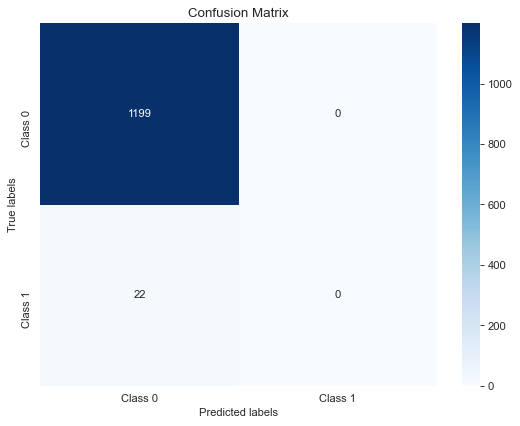

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Generate the classification report
report_cat = classification_report(y_pred_cat, y_test)

# Print the classification report
print("Classification Report:")
print(report_cat)
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_cat)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### LightGBM

In [80]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# Assuming d_new is your complete DataFrame
# Assuming X_train and X_test are feature datasets, and y_train and y_test are labels

# Get column names for all categorical features
cat_feature_names = d_new.select_dtypes(include=['object']).columns.tolist()

# Use LabelEncoder to transform all categorical features to integers
label_encoders = {col: LabelEncoder() for col in cat_feature_names}

# 对于训练数据，我们将使用fit_transform方法
for feature_name in cat_feature_names:
    X_train[feature_name] = label_encoders[feature_name].fit_transform(X_train[feature_name])

# 对于测试数据，我们使用transform方法，并处理未见过的标签
for feature_name in cat_feature_names:
    # 获取训练数据中的类别
    train_categories = set(label_encoders[feature_name].classes_)
    # 用一个未见过的类别标签 'unknown' 替换所有新类别
    X_test[feature_name] = X_test[feature_name].apply(lambda x: x if x in train_categories else 'unknown')
    # 对于测试集，首先使用fit方法将 'unknown' 添加到类别中
    label_encoders[feature_name].fit(list(label_encoders[feature_name].classes_) + ['unknown'])
    # 然后进行转换
    X_test[feature_name] = label_encoders[feature_name].transform(X_test[feature_name])


# Initialize LightGBM classifier
lgbm_classifier = LGBMClassifier(n_estimators=100, learning_rate=0.1)

# Train the model, passing categorical feature names directly to the `categorical_feature` parameter
lgbm_classifier.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_names=['eval'],
    categorical_feature=cat_feature_names,
)

# Predict on the test set
y_pred_lgbm = lgbm_classifier.predict(X_test)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 90, number of negative: 4792
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1651
[LightGBM] [Info] Number of data points in the train set: 4882, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018435 -> initscore=-3.974893
[LightGBM] [Info] Start training from score -3.974893


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1221
           1       0.00      0.00      0.00         0

    accuracy                           0.98      1221
   macro avg       0.50      0.49      0.50      1221
weighted avg       1.00      0.98      0.99      1221


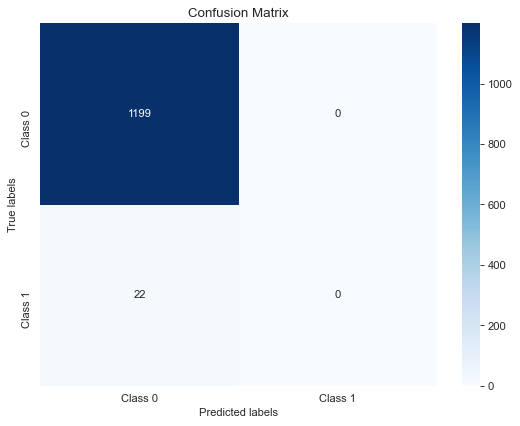

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Generate the classification report
report_lgbm = classification_report(y_pred_lgbm, y_test)

# Print the classification report
print("Classification Report:")
print(report_lgbm)
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Imbalanced Data & Baseline model after SMOTE

## Decision tree

In [14]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are your training features and labels, respectively
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [15]:
# # Plot the distribution of the target variable before SMOTE
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# sns.countplot(y_train)
# plt.title('Distribution of target variable before SMOTE')
# 
# # Plot the distribution of the target variable after SMOTE
# plt.subplot(1, 2, 2)
# sns.countplot(y_train_smote)
# plt.title('Distribution of target variable after SMOTE')
# 
# plt.tight_layout()
# plt.show()


In [16]:
# Initialize the decision tree classifier
dt_classifier_smote = DecisionTreeClassifier(random_state=42)

# Train the classifier on the resampled data
dt_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote = dt_classifier_smote.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1190
           1       0.18      0.13      0.15        31

    accuracy                           0.96      1221
   macro avg       0.58      0.56      0.57      1221
weighted avg       0.96      0.96      0.96      1221


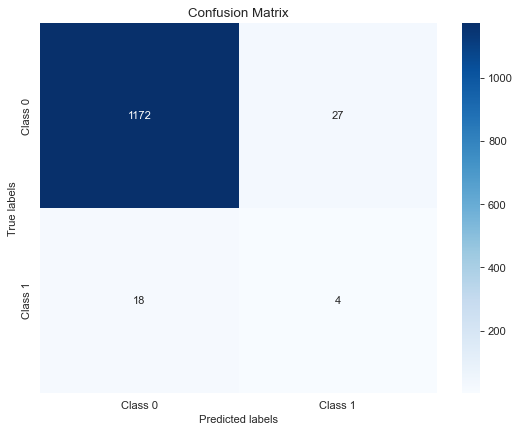

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Generate the classification report
report_smote = classification_report(y_pred_smote, y_test)

# Print the classification report
print("Classification Report:")
print(report_smote)
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Catboost

In [18]:
from catboost import CatBoostClassifier

# Initialize the CatBoost classifier
catboost_classifier_smote = CatBoostClassifier(random_state=42)

# Train the classifier on the resampled data
catboost_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_cat = catboost_classifier_smote.predict(X_test)


Learning rate set to 0.027043
0:	learn: 0.6633162	total: 82ms	remaining: 1m 21s
1:	learn: 0.6380154	total: 95.7ms	remaining: 47.8s
2:	learn: 0.6048020	total: 109ms	remaining: 36.1s
3:	learn: 0.5746519	total: 122ms	remaining: 30.3s
4:	learn: 0.5518470	total: 136ms	remaining: 27s
5:	learn: 0.5268473	total: 155ms	remaining: 25.7s
6:	learn: 0.5093297	total: 172ms	remaining: 24.4s
7:	learn: 0.4880872	total: 195ms	remaining: 24.2s
8:	learn: 0.4720936	total: 215ms	remaining: 23.6s
9:	learn: 0.4522093	total: 229ms	remaining: 22.6s
10:	learn: 0.4338651	total: 242ms	remaining: 21.7s
11:	learn: 0.4149457	total: 257ms	remaining: 21.2s
12:	learn: 0.4032815	total: 274ms	remaining: 20.8s
13:	learn: 0.3880945	total: 289ms	remaining: 20.3s
14:	learn: 0.3757927	total: 306ms	remaining: 20.1s
15:	learn: 0.3663225	total: 321ms	remaining: 19.8s
16:	learn: 0.3478514	total: 341ms	remaining: 19.7s
17:	learn: 0.3364193	total: 359ms	remaining: 19.6s
18:	learn: 0.3288024	total: 377ms	remaining: 19.5s
19:	learn: 0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1219
           1       0.05      0.50      0.08         2

    accuracy                           0.98      1221
   macro avg       0.52      0.74      0.54      1221
weighted avg       1.00      0.98      0.99      1221


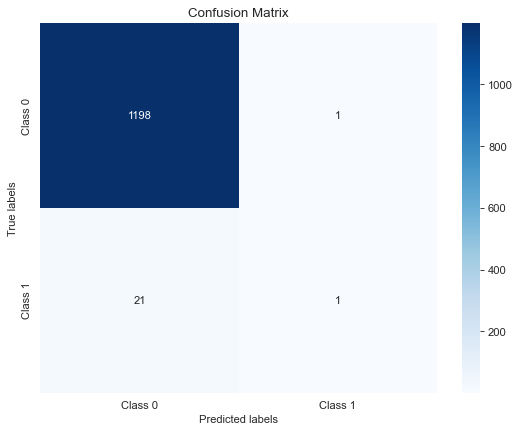

In [19]:
# Generate the classification report
report_smote_cat = classification_report(y_pred_smote_cat, y_test)

# Print the classification report
print("Classification Report:")
print(report_smote_cat)
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote_cat)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
nb_classifier_smote = MultinomialNB()

# Train the classifier on the resampled data
nb_classifier_smote.fit(X_train_smote, y_train_smote)

# Predict on the testing data
y_pred_smote_nb = nb_classifier_smote.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.98      0.72       696
           1       0.32      0.01      0.03       525

    accuracy                           0.56      1221
   macro avg       0.44      0.50      0.37      1221
weighted avg       0.46      0.56      0.42      1221


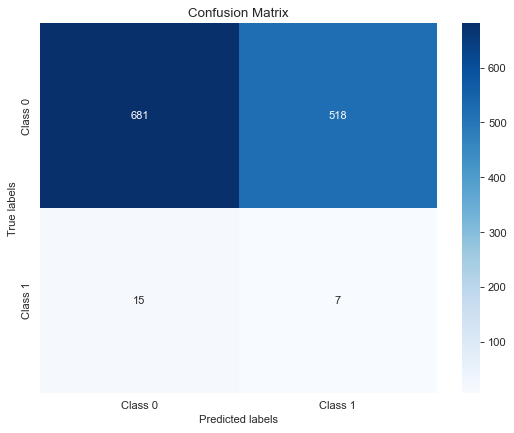

In [21]:
# Generate the classification report
report_smote_nb = classification_report(y_pred_smote_nb, y_test)

# Print the classification report
print("Classification Report:")
print(report_smote_nb)
# Assuming y_test and y_pred are the true labels and predicted labels, respectively
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_smote_nb)

# Define class labels (if applicable)
class_labels = ['Class 0', 'Class 1']  # Replace with your actual class labels if available

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## LightGBM


## neural network -换object

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, validation_split=0.2)

# Predict on the testing data
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5548 - loss: 807.9276 - val_accuracy: 0.0104 - val_loss: 0.7530
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6308 - loss: 0.6896 - val_accuracy: 0.0000e+00 - val_loss: 0.8377
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6313 - loss: 0.6651 - val_accuracy: 0.0000e+00 - val_loss: 0.8932
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6206 - loss: 0.6653 - val_accuracy: 0.0000e+00 - val_loss: 0.9288
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6253 - loss: 0.6622 - val_accuracy: 0.0000e+00 - val_loss: 0.9525
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6238 - loss: 0.6623 - val_accuracy: 0.0000e+00 - val_loss: 0.9649
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6208 - loss: 0.6639 - val_accuracy: 0.0000e+00 - val_loss: 0.9740
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6345 - loss:

# Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a professional body (e.g. FreddiMac company or similar company). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

# Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*You should also split your data into training and testing sets, ideally before you look to much into the features and relationships with the target*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. Feature engineering that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*If you decide to extract additional features from the full data (easyshare_all.csv), describe these variables here.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

## EDA

In [3]:
# Print the first few rows of the data
d.head(10)

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,zipcode,id_loan,loan_purpose,orig_loan_term,cnt_borr,seller_name,servicer_name,flag_sc,prepaid,default
0,709.0,201703,9,204702,NaN,12,1,P,84,26,...,51300,F117Q1000376,N,360,2,Other sellers,Other servicers,NaN,0,1
1,649.0,201703,9,203202,33124.0,0,1,P,52,22,...,33100,F117Q1000418,C,180,2,Other sellers,Other servicers,NaN,1,0
2,747.0,201703,9,203702,41180.0,0,1,I,43,20,...,63100,F117Q1000479,N,240,2,Other sellers,Other servicers,NaN,1,0
3,711.0,201703,9,204702,20260.0,0,1,I,80,21,...,55800,F117Q1000523,P,360,2,Other sellers,Other servicers,NaN,1,0
4,751.0,201703,N,204702,NaN,35,1,P,95,24,...,75900,F117Q1000719,P,360,1,Other sellers,ARVESTCENTRALMTGECO,NaN,1,0
5,808.0,201703,9,203202,NaN,0,1,P,49,33,...,65700,F117Q1001077,N,180,2,Other sellers,Other servicers,NaN,1,0
6,634.0,201703,N,203202,NaN,0,1,P,55,37,...,42100,F117Q1001140,P,180,1,Other sellers,Other servicers,NaN,1,0
7,714.0,201703,9,204702,19804.0,0,1,I,80,22,...,48100,F117Q1001292,N,360,2,Other sellers,Other servicers,NaN,1,0
8,752.0,201703,9,203202,NaN,0,1,P,63,24,...,51300,F117Q1001382,C,180,2,Other sellers,Other servicers,NaN,1,0
9,673.0,201704,Y,204703,NaN,30,1,P,95,45,...,14800,F117Q1001443,P,360,2,Other sellers,Other servicers,NaN,0,1


In [4]:
# Describe the data
d.describe()

,fico,dt_first_pi,dt_matr,cd_msa,mi_pct,cnt_units,cltv,dti,orig_upb,ltv,int_rt,zipcode,orig_loan_term,cnt_borr,prepaid,default
count,6103.000000,6104.000000,6104.000000,5510.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000,6104.000000
mean,744.762740,201735.558650,204456.275885,30746.564428,5.027031,1.030799,72.502785,35.964613,244066.186107,72.046527,4.386463,61015.612713,327.018676,1.482634,0.981488,0.018512
std,48.208044,44.837849,573.354730,11158.605589,10.526750,0.246957,20.808191,15.583786,131445.871930,20.809927,0.508065,29401.664859,68.374234,0.499739,0.134806,0.134806
min,549.000000,201702.000000,202504.000000,10180.000000,0.000000,1.000000,7.000000,3.000000,22000.000000,7.000000,2.625000,800.000000,96.000000,1.000000,0.000000,0.000000
25%,708.000000,201705.000000,204702.000000,19740.000000,0.000000,1.000000,65.000000,29.000000,143000.000000,64.000000,4.125000,33900.000000,360.000000,1.000000,1.000000,0.000000
50%,753.000000,201709.000000,204706.000000,33340.000000,0.000000,1.000000,77.000000,38.000000,218000.000000,75.000000,4.375000,65000.000000,360.000000,1.000000,1.000000,0.000000
75%,786.000000,201802.000000,204711.000000,40140.000000,0.000000,1.000000,80.000000,43.000000,328000.000000,80.000000,4.750000,89800.000000,360.000000,2.000000,1.000000,0.000000
max,832.000000,201901.000000,204812.000000,49740.000000,35.000000,4.000000,999.000000,999.000000,795000.000000,999.000000,6.125000,99900.000000,360.000000,2.000000,1.000000,1.000000


In [5]:
# Get the info of the data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fico            6103 non-null   float64
 1   dt_first_pi     6104 non-null   int64  
 2   flag_fthb       6104 non-null   object 
 3   dt_matr         6104 non-null   int64  
 4   cd_msa          5510 non-null   float64
 5   mi_pct          6104 non-null   int64  
 6   cnt_units       6104 non-null   int64  
 7   occpy_sts       6104 non-null   object 
 8   cltv            6104 non-null   int64  
 9   dti             6104 non-null   int64  
 10  orig_upb        6104 non-null   int64  
 11  ltv             6104 non-null   int64  
 12  int_rt          6104 non-null   float64
 13  channel         6104 non-null   object 
 14  ppmt_pnlty      6066 non-null   object 
 15  prod_type       6104 non-null   object 
 16  st              6104 non-null   object 
 17  prop_type       6104 non-null   o

### Distribution of the target variable

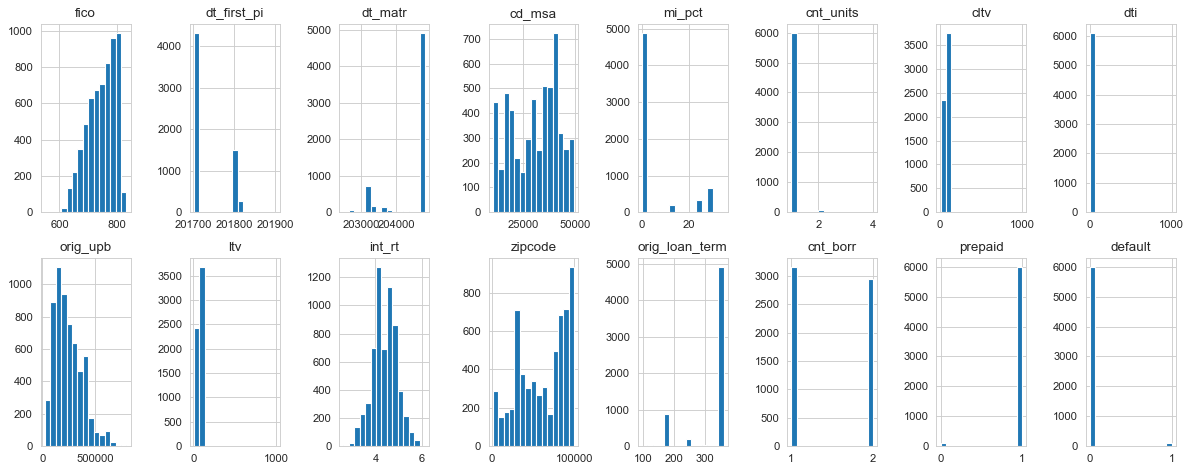

In [6]:
# Distribution of numerical features
numeric_cols = d.select_dtypes(include=[np.number]).columns

# Plot the histograms of the numerical features
d[numeric_cols].hist(bins=15, figsize=(15, 6), layout=(2, -1))
plt.tight_layout()
plt.show()

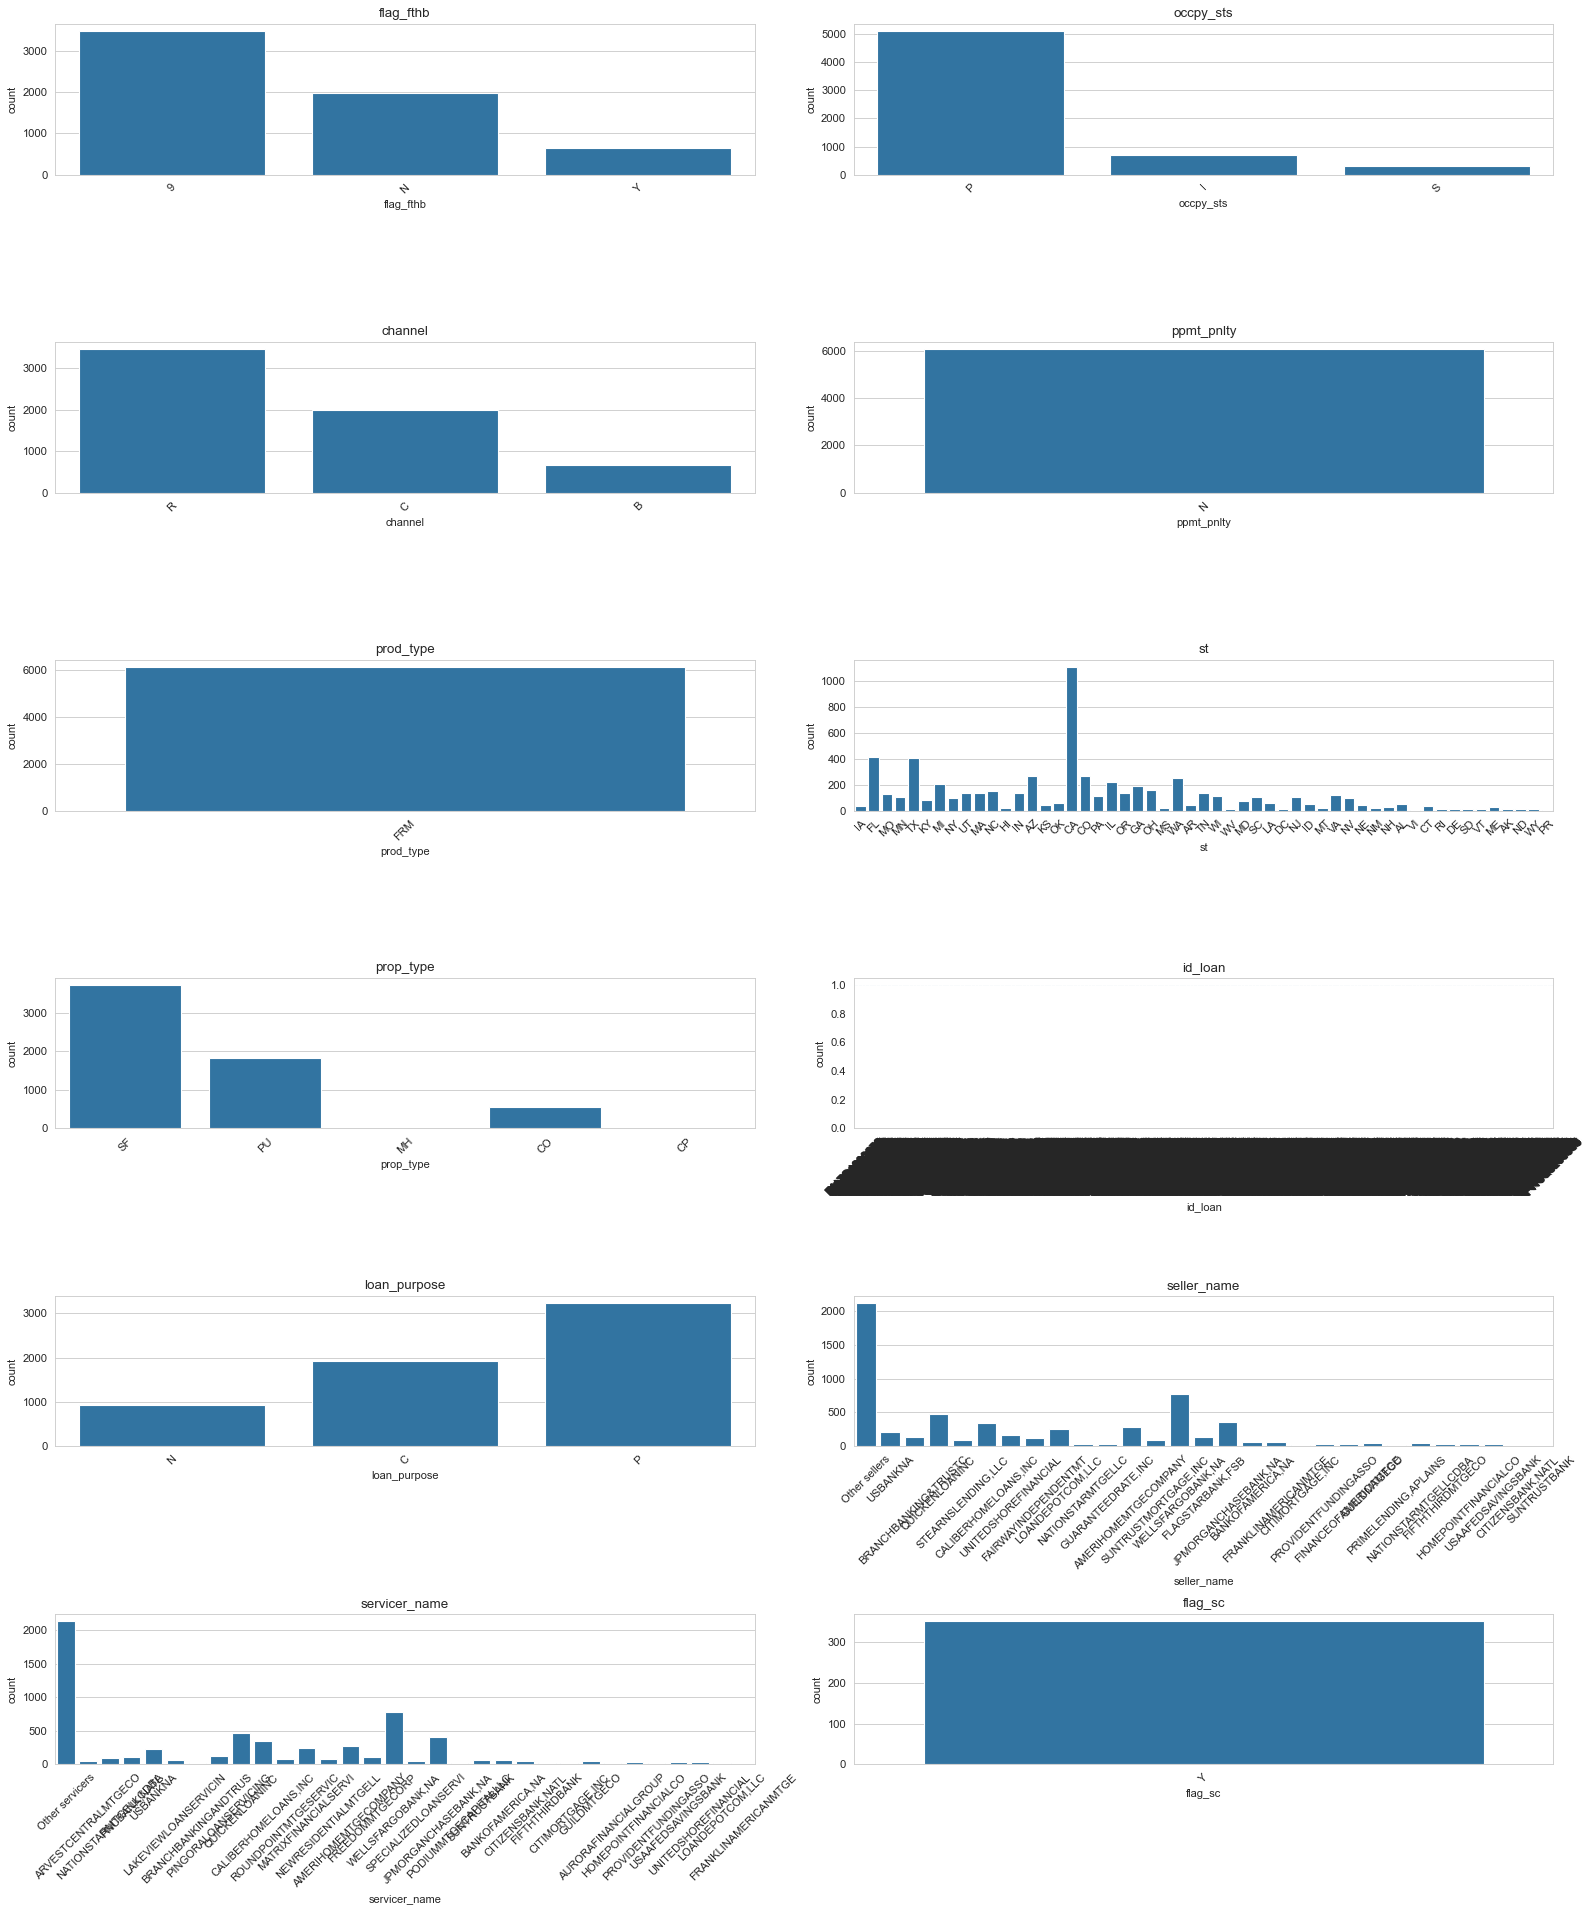

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming category_cols is a list of your categorical column names
category_cols = d.select_dtypes(include=['object']).columns

# Set the number of columns for subplots
n_cols = 2
n_rows = (len(category_cols) + 1) // n_cols

# Set up the matplotlib figure
plt.figure(figsize=(20, 4 * n_rows))

# Loop through the number of columns and create a countplot for each one
for i, col in enumerate(category_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(data=d, x=col)
    plt.title(col)
    plt.xticks(rotation=45)

# Adjust layout for better display and show the plot
plt.tight_layout()
plt.show()



### Correlation between numerical features

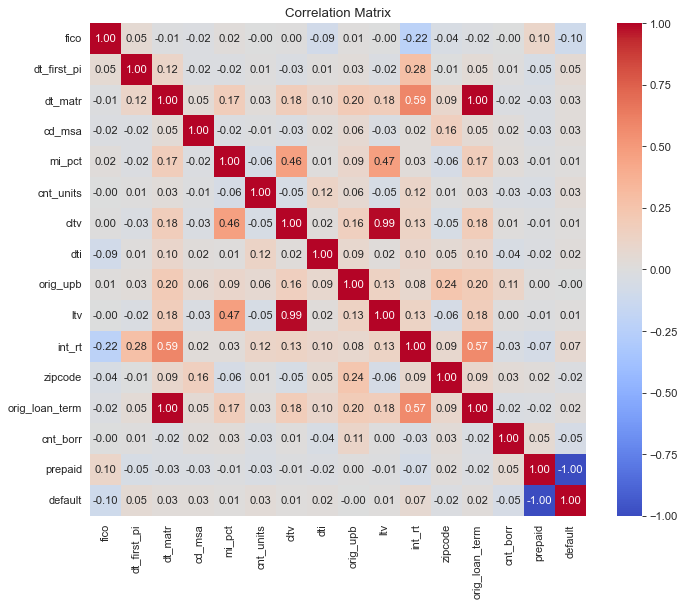

In [8]:
# Calculate the correlation matrix
corr = d[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [9]:
# Find the missing values in the data
d.isnull().sum()

fico                 1
dt_first_pi          0
flag_fthb            0
dt_matr              0
cd_msa             594
mi_pct               0
cnt_units            0
occpy_sts            0
cltv                 0
dti                  0
orig_upb             0
ltv                  0
int_rt               0
channel              0
ppmt_pnlty          38
prod_type            0
st                   0
prop_type            0
zipcode              0
id_loan              0
loan_purpose         0
orig_loan_term       0
cnt_borr             0
seller_name          0
servicer_name        0
flag_sc           5751
prepaid              0
default              0
dtype: int64

In [10]:
# Drop the missing value in 'fico'
d_new = d.dropna(subset=['fico'])

# Fill the missing value in 'cd_msa' and 'flag_sc' with 9
d_new['cd_msa'] = d_new['cd_msa'].fillna(9)
d_new['flag_sc'] = d_new['flag_sc'].fillna(9)
d_new= d_new.drop('prepaid', axis=1)

# Convert 'cd_msa' and 'zipcode' columns to 'object' data type
d_new['cd_msa'] = d_new['cd_msa'].astype('object')
d_new['zipcode'] = d_new['zipcode'].astype('object')

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
# List of numerical features
numeric_features = d_new.select_dtypes(include=['int64', 'float64']).drop(['default'], axis=1).columns

# List of categorical features
categorical_features = d_new.select_dtypes(include=['object']).columns

# Define the target variable
y = d_new['default']


In [26]:
# Scaling for numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Convert all categorical features to strings
for col in categorical_features:
    d_new[col] = d_new[col].astype(str)

# Continue with the encoding process as before
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Applying the transformations to the data
X_processed = preprocessor.fit_transform(d_new)

print(X_processed.shape)


(6103, 7334)


## Dimensionality Reduction (PCA)

In [31]:
from sklearn.decomposition import PCA

X_dense = X_processed.toarray()  # Convert to dense matrix if not too large
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_dense)


print(f"Original number of features: {X_processed.shape[1]}")
print(f"Reduced number of features: {X_pca.shape[1]}")


Original number of features: 7334
Reduced number of features: 587


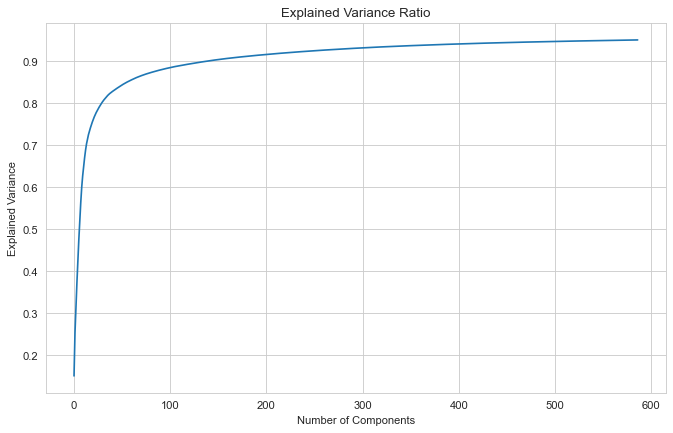

In [32]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()


## Feature Selection and New Features Creation

#### Selecting Features with High Variance

In [35]:
from sklearn.feature_selection import VarianceThreshold

# set the threshold to 0.01
selector = VarianceThreshold(threshold=0.01) # select features with variance above 0.01
X_high_variance = selector.fit_transform(X_pca)

print(X_high_variance.shape)


(6103, 118)


#### Selecting Features with High Correlation

(6103, 7)
[0 1 2 6 7 8 9]


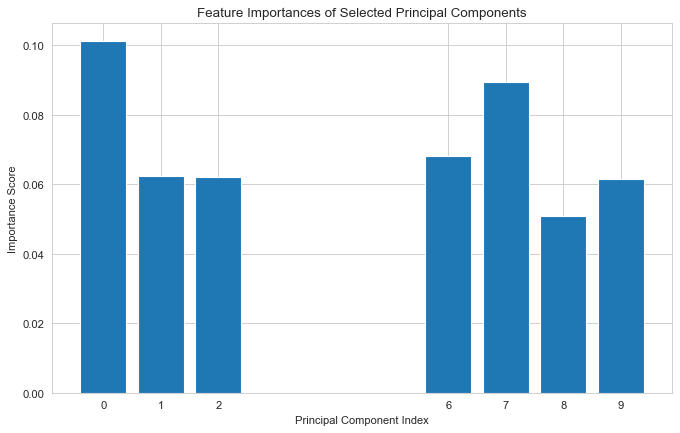

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Define the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the SelectFromModel object with a threshold
sfm = SelectFromModel(rf, threshold=0.05) # Threshold can be adjusted

# Fit the model and transform the data
# Since PCA has already been applied, y needs to correspond to the rows in X_high_variance
X_selected = sfm.fit_transform(X_high_variance, y)

# Print the shape of the selected data
print(X_selected.shape)

# Feature importances can be accessed with sfm.estimator_.feature_importances_
# But they refer to the principal components, not the original features
importances = sfm.estimator_.feature_importances_

# If you need the indices of the selected features (principal components)
selected_indices = sfm.get_support(indices=True)
print(selected_indices)

# If you want to visualize the importance of the selected components
import matplotlib.pyplot as plt

# Plot only the importances of the selected features
selected_importances = importances[selected_indices]

plt.figure(figsize=(10, 6))
plt.bar(selected_indices, selected_importances, orientation='vertical')
plt.xticks(selected_indices, selected_indices)
plt.title('Feature Importances of Selected Principal Components')
plt.xlabel('Principal Component Index')
plt.ylabel('Importance Score')
plt.show()


#### Recursive Feature Elimination (RFE)

RFE (Recursive Feature Elimination) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. It is a greedy optimization algorithm that aims to find the best performing subset of features. The number of features to keep is specified by the user and the algorithm starts by considering all features and eliminates the least important features one by one until the specified number of features is reached.

In [43]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define a simpler model for RFE, or reduce the number of estimators
estimator = RandomForestClassifier(n_estimators=50, random_state=42)  # Less estimators

# Define the RFE selector with the estimator and a reduced number of features to select
rfe_selector = RFE(estimator, n_features_to_select=5, step=5)  # Adjust step to remove more features each iteration

# Fit the RFE selector to the data - this might still take some time
rfe_selector.fit(X_pca, y)

# Get the selected features
selected_features = rfe_selector.support_

# Print the selected feature indices
selected_indices = [i for i, selected in enumerate(selected_features) if selected]
print("Selected feature indices:", selected_indices)

# Optionally, you can print the ranking of features
print("Feature rankings:", rfe_selector.ranking_)


KeyboardInterrupt: 

#### Feature Importance from Trees

In [42]:
# Define the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_pca, y)

# Get feature importances
importances = rf.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking for the PCA components
print("Feature ranking:")
for f in range(X_pca.shape[1]):  # Notice that we use X_pca.shape[1] here
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. feature 32 (0.009599578932665241)
2. feature 281 (0.009109499493334663)
3. feature 9 (0.006500543426632708)
4. feature 170 (0.00618486862339524)
5. feature 152 (0.006037350849857538)
6. feature 150 (0.0057604434576967985)
7. feature 4 (0.005666013108772335)
8. feature 18 (0.005648521582761332)
9. feature 107 (0.005618737745027271)
10. feature 2 (0.005575392521766878)
11. feature 48 (0.005420312565720843)
12. feature 89 (0.005388108328026717)
13. feature 568 (0.005297263575402362)
14. feature 260 (0.005290058348209107)
15. feature 36 (0.0051772234300106286)
16. feature 33 (0.005089839798626219)
17. feature 261 (0.004924659377159536)
18. feature 3 (0.004672804443179705)
19. feature 220 (0.0045484515074774474)
20. feature 338 (0.0045409778139537185)
21. feature 92 (0.004361187832932628)
22. feature 466 (0.004328416835136932)
23. feature 25 (0.004315000929498141)
24. feature 451 (0.004184232853641795)
25. feature 14 (0.0041571802878288796)
26. feature 496 (0.00407102152

IndexError: index 587 is out of bounds for axis 0 with size 587

#### Selecting Features with L1 Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Define the LogisticRegression model with L1 regularization
logistic = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Create the SelectFromModel object
sfm = SelectFromModel(logistic, threshold=0.05)  # Threshold can be adjusted

# Fit the model and transform the data
X_selected = sfm.fit_transform(X_pca, y)

# Print the shape of the selected data
print(X_selected.shape)

# Get the selected features
selected_features = sfm.get_support()

# Print the selected feature indices
selected_indices = [i for i, selected in enumerate(selected_features) if selected]
print("Selected feature indices:", selected_indices)


#### New Features Creation

In [ ]:
# Create five bins for the 'fico' column
bins = [300, 580, 670, 740, 800, 850] # fico score ranges
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
d_new['fico_category'] = pd.cut(d_new['fico'], bins=bins, labels=labels, right=False)

# do log transformation on 'fico'
d_new['fico_log'] = np.log(d_new['fico'] + 1)

## Splitting the Data into Training and Testing Sets

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, interaction terms, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validating it.*

*For example if you considered a linear regression model, a polynomial regression, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

*Finally, you should also provide comparison of your model with baseline model(s) on the test data but only briefly describe the baseline model(s) considered*

# Discussion & Conclusions

*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a government official or charity directy, who is understands the pressing challenges associated with ageining and dementia but may only have university level mathematics (not necessarily postgraduate statistics or machine learning). Your goal should be to highlight to this audience how your model can useful. You should also mention potential limitations of your model.*

*Finally, you should include recommendations on potential lifestyle changes or governmental/societal interventions to reduce dementia risk.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

# References

*Include references if any*

In [23]:
# Run the following to render to PDF
!jupyter nbconvert --to pdf project2.ipynb

[NbConvertApp] Converting notebook project2.ipynb to pdf
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('block_group' was unexpected)

Failed validating 'additionalProperties' in markdown_cell:

On instance['cells'][0]:
{'block_group': 'd12f5692dbf546e09c5366fefe31e721',
 'cell_type': 'markdown',
 'metadata': {'cell_id': 'a9c673f4b97f45d0975f547cb6070545',
              'deepnote_cell_type': 'markdown'},
 'source': '# Machine Learning in Python - Project 2\n'
           '\n'
           'Due Friday, April 12th...'}
[NbConvertApp] ERROR | Error while converting 'project2.ipynb'
Traceback (most recent call last):
  File "/Users/scarlettj/PycharmProjects/Numerical Linear Algebra/venv/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 479, in export_single_notebook
    output, resources = self.exporter.from_filename(
  File "/Users/scarlettj/PycharmProjects/Numerical Linear Algebra/venv/lib/python3.9/site-packages/nbconvert/exporters/templa

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a2a9ec8d-a343-4210-b36b-f9db26268fc5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>